In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get update > /dev/null 2>&1
!pip install selenium > /dev/null 2>&1
!apt install chromium-chromedriver > /dev/null 2>&1

In [3]:
import time # 새로운 페이지로 셀레니음 웹드라이버가 넘어갈 때마다 잠시 멈춰주는 역할을 위해 불러옴. 
# 멈춰주지 않으면 페이지가 다 로딩되기도 전에 다음 코드를 실행해버리는 불상사가 생김. 그걸 막아준다.
from selenium import webdriver # 웹드라이버. 코랩이라 우리가 직접 볼 순 없지만 얘가 돌아다니면서 일을 해줌
from selenium.webdriver.common.keys import Keys # 이 파일에선 아직 딱히 쓰지 않은듯
from selenium.webdriver.common.by import By # element를 찾을 때 쓰이는 parameter를 불러오는 역할
import pandas as pd 
from bs4 import BeautifulSoup # html 요소에 접근해서 정보를 빼내올 때 씀
from tqdm import tqdm
import pickle
import numpy as np

In [4]:
import warnings # 사실 잘 모르지만 선생님이 하셨던거 암튼 가져옴
warnings.filterwarnings('ignore')

In [110]:
#크롬 드라이버의 각종 옵션들 생성 및 적용.
options = webdriver.ChromeOptions()
options.add_argument('--headless') # 화면없이 실행
options.add_argument('--no-sandbox')
options.add_argument('--single-process')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36') # 나는 기계가 아니고 사람이에요
driver = webdriver.Chrome('chromedriver', options=options)

In [6]:
spring_url = 'https://www.melon.com/search/lyric/index.htm?q=%EB%B4%84&section=&searchGnbYn=Y&kkoSpl=N&kkoDpType='

In [15]:
driver.get(spring_url)

In [12]:
text = driver.find_element(By.CSS_SELECTOR, '#d_video_summary').text.replace('\n\n','\n')

In [13]:
text.split('\n')

['산꼴짜기 여기저기 봄의 향기가',
 '겨우내 숨어 있던 산새들의 노래 들리고',
 '산등성이 하얀 눈은 이제 보이지 않고',
 '이것이 우리주님 약속하신 봄의 모습 아닌가',
 '내가 염려했던 지난 날들과',
 '영원히 계속될 것만 같았던 추운 겨울은',
 '주님의 약속대로 흔적도 없고',
 '내 하나님 행하신 일 만물이 찬양하누나',
 '싱그러운 봄 같은 그 분의 향기',
 '따스한 사랑으로 내 삶을 아름답게 하네',
 '그 분으로 가득찬 하루 또 하루',
 '이것이 우리주님 약속하신 봄의 모습 아닌가']

In [16]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [ ]:
buttons = soup.select('a.btn.btn_icon_detail')
buttons

In [19]:
buttons[0]['data-song-no']

'640397'

In [14]:
driver.find_elements(By.CSS_SELECTOR, 'a.btn.btn_icon_detail')

[]

In [20]:
song_url_base = 'https://www.melon.com/song/detail.htm?songId='
song_url = song_url_base + buttons[0]['data-song-no']
driver.get(song_url)

In [21]:
text = driver.find_element(By.CSS_SELECTOR, '#d_video_summary').text.replace('\n\n','\n')
text

'산꼴짜기 여기저기 봄의 향기가\n겨우내 숨어 있던 산새들의 노래 들리고\n산등성이 하얀 눈은 이제 보이지 않고\n이것이 우리주님 약속하신 봄의 모습 아닌가\n내가 염려했던 지난 날들과\n영원히 계속될 것만 같았던 추운 겨울은\n주님의 약속대로 흔적도 없고\n내 하나님 행하신 일 만물이 찬양하누나\n싱그러운 봄 같은 그 분의 향기\n따스한 사랑으로 내 삶을 아름답게 하네\n그 분으로 가득찬 하루 또 하루\n이것이 우리주님 약속하신 봄의 모습 아닌가'

In [109]:
song_url_base = 'https://www.melon.com/song/detail.htm?songId='
spring_url = 'https://www.melon.com/search/lyric/index.htm?q=%EB%B4%84&section=&searchGnbYn=Y&kkoSpl=N&kkoDpType='
spring_sentences = []
for i in range(5):
    driver.get(spring_url)
    time.sleep(1)
    if i != 0:
        driver.find_element(By.XPATH, f'//*[@id="pageObjNavgation"]/div/span/a[{i}]').click()
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    buttons = soup.select('a.btn.btn_icon_detail')
    for bt in buttons:
        song_url = song_url_base+bt['data-song-no']
        driver.get(song_url)
        time.sleep(1)
        text = driver.find_element(By.CSS_SELECTOR, '#d_video_summary').text.replace('\n\n','\n')
        spring_sentences.append(text.split('\n'))

KeyboardInterrupt: ignored

In [ ]:
spring_sentences

In [28]:
data = []
for i in spring_sentences:
    data.append([i])

In [37]:
df = pd.DataFrame(data, columns = ['lyric'])

In [31]:
df

,lyric
0,"[산꼴짜기 여기저기 봄의 향기가, 겨우내 숨어 있던 산새들의 노래 들리고, 산등성이..."
1,"[산 골짜기 여기 저기 봄의 향기가, 겨우내 숨어있던 산새들의 노래 들리고, 산등성..."
2,"[저 넓은 들판에 파랗게, 새 봄이 왔어요, 가로등 그늘 밑에도, 새 봄이 왔~어요..."
3,"[수줍던 손끝, 너의 손에서, 피어나던 꽃들, 그 꽃, 그리운 발끝, 부서지는 땅,..."
4,"[봄 여름 겨울 가을중에, 너는 뭐가 좋냐고, 내게 물었었지, 봄봄봄봄봄봄봄, 벚꽃..."
...,...
70,"[봄이 왔네, 봄이 왔어, 꽃이 지면 꽃피나, 봄이 왔어, 봄이 왔네, 봄이 왔어,..."
71,"[봄 봄 봄 봄 봄, 들리나요, 봄이 부르는 소리, 곤히 잠든 가지를 흔들어, 눈 ..."
72,"[저 넓은 들판에 파랗게, 새 봄이 왔어요, 가로등 그늘 밑에도, 새 봄이 왔 어요..."
73,"[우리 가는 길 위, 초라한 마음들, 알 수 없는 고독 감싸 안으며, 쓸쓸히 오늘이..."


In [38]:
df.iloc[0,0]

['산꼴짜기 여기저기 봄의 향기가',
 '겨우내 숨어 있던 산새들의 노래 들리고',
 '산등성이 하얀 눈은 이제 보이지 않고',
 '이것이 우리주님 약속하신 봄의 모습 아닌가',
 '내가 염려했던 지난 날들과',
 '영원히 계속될 것만 같았던 추운 겨울은',
 '주님의 약속대로 흔적도 없고',
 '내 하나님 행하신 일 만물이 찬양하누나',
 '싱그러운 봄 같은 그 분의 향기',
 '따스한 사랑으로 내 삶을 아름답게 하네',
 '그 분으로 가득찬 하루 또 하루',
 '이것이 우리주님 약속하신 봄의 모습 아닌가']

In [39]:
for i in range(len(df['lyric'])):
    df.iloc[i,0] = ' '.join(df.iloc[i,0])

In [40]:
df['lyric'] = df['lyric'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

In [ ]:
df

In [42]:
! pip install kss konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.4 MB 1.4 MB/s 
     |████████████████████████████████| 19.4 MB 16.3 MB/s 
     |████████████████████████████████| 131 kB 49.7 MB/s 
     |████████████████████████████████| 453 kB 85.3 MB/s 
  Created wheel for kss: filename=kss-3.5.5-py3-none-any.whl size=42448240 sha256=8aab03e5fb61b7ea6f2be3b4c8d9e37f1b85819e320af35199d3a5a8b8a20672
  Stored in directory: /root/.cache/pip/wheels/80/92/60/36f882f5fd62ef248bb51e4c9cbe3d114281e41158c2d0caf2
Successfully built kss
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 26 not upgraded.
Need to get 9,604 kB of archive

In [43]:
from tqdm import tqdm
from konlpy.tag import Okt
okt = Okt()
content_noun = []
for i in tqdm(df['lyric']):
    tkl = okt.nouns(i)
    tkl = [l for l in tkl if len(l) >= 2]
    content_noun.extend(tkl)

100%|██████████| 75/75 [00:10<00:00,  7.36it/s]


In [44]:
from nltk import Text
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
spring = Text(content_noun, name = 'spring')

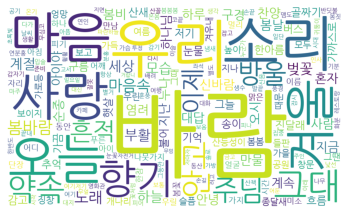

In [45]:
wc=WordCloud(font_path='NanumGothic',width=1000,height=600,background_color='white')
plt.imshow(wc.generate_from_frequencies(spring.vocab()))
plt.axis('off')
plt.show()

In [47]:
driver.get('https://www.genie.co.kr/detail/songInfo?xgnm=81826533')

지니뮤직

In [49]:
driver.find_element(By.CSS_SELECTOR, '#pLyrics p').text

'흥에 겨워 여름이 오면\n가슴을 활짝 열어요\n넝쿨 장미 그늘 속에도 \n젊음이 넘쳐흐르네\n산도 좋고 물도 좋아라 \n떠나는 여행길에서\n마주치는 사람들마다 \n사랑이 오고가네요\n여름은 젊음의 계절 \n여름은 사랑의 계절\n갈숲 사이 바람이 불어 \n한낮의 더위를 씻고 \n밤이 오면 모닥불가에 \n우리의 꿈이 익어요\n여름은 젊음의 계절 \n여름은 사랑의 계절\n갈숲 사이 바람이 불어 \n한낮의 더위를 씻고 \n밤이 오면 모닥불가에 \n우리의 꿈이 익어요\n여름은 젊음의 계절\n여름은 사랑의 계절\n여름은 젊음의 계절\n여름은 사랑의 계절'

In [50]:
gini_spring_url = 'https://www.genie.co.kr/search/searchSong?Coll=sAll&query=%25EB%25B4%2584&page=1&pagesize=20&of=&fscount=&Genre=&Country=%EA%B5%AD%EB%82%B4&reQuery=&researchyn=N'
driver.get(gini_spring_url)


In [51]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
trs = soup.select('tbody tr')
trs[0]['songid']

'88684311'

In [52]:
song_url = 'https://www.genie.co.kr/detail/songInfo?xgnm=88684311'
driver.get(song_url)

In [54]:
driver.find_element(By.CSS_SELECTOR, '#pLyrics p').text.replace('\n\n','\n').replace('\n',' ')

"Pull me down 끝없이 날 깊은 어둠 그 속으로 Baby Lay me down 내 떨리는 두 손을 네게 묶여버린 채로 나만 혼자인 거 같아 이대로 다 잊혀져버릴 것 같아 나 깨어있는 이 시간이 너무나도 괴로워 always (Oh Oh Oh) 우울할 때면 (Oh Oh Oh) 어느새 또 나도 모르게 너를 찾아 헤매는 내가 너무 미웠죠 (Oh Oh Oh) 바보처럼 또 (Oh Oh Oh) 울고 있으면 봄바람에 내 맘이 전해질까봐 나에게도 봄 다시 봄이 올까요 아름다운 꽃 맘에 꽃이 필까요 이 차가운 바람이 지나고 내 마음이 녹아내리면 다시 봄 내 마음에도 봄 봄 봄이 올까요 You pull me down but I'm all right You make me cry but I'm all right 너란 추억은 다시 lay me down 언제 울었냐는 듯 make me laugh 이제 곧 괜찮아질 거야 시간이 지나가면 yeah 떠나간 빈자리가 아직은 내게는 크지만 뭐 yeah 찬바람이 지나가면 내 맘에도 봄이 오겠지 뭐 (Oh Oh Oh) 우울할 때면 (Oh Oh Oh) 어느새 또 나도 모르게 너를 찾아 헤매는 내가 너무 미웠죠 (Oh Oh Oh) 바보처럼 또 (Oh Oh Oh) 울고 있으면 봄바람에 내 맘이 전해질까봐 나에게도 봄 다시 봄이 올까요 아름다운 꽃 맘에 꽃이 필까요 이 차가운 바람이 지나고 내 마음이 녹아내리면 다시 봄 내 마음에도 봄 봄 봄이 올까요 그대가 내게 준 이 아픔이 지나가고 내 두 볼에 흐르는 이 눈물이 마르면 나에게도 봄 아름다운 꽃 이 차가운 바람이 지나고 내 마음이 녹아내리면 다시 봄 내 마음에도 봄 봄 봄이 올까요"

In [ ]:
# //*[@id="body-content"]/div[4]/div[5]/a[13]
# //*[@id="body-content"]/div[4]/div[5]/a[13]
# //*[@id="body-content"]/div[4]/div[5]/a[13]

In [111]:
ginie_spring_url = 'https://www.genie.co.kr/search/searchSong?Coll=sAll&query=%25EB%25B4%2584&page=1&pagesize=20&of=SCORE&fscount=&Genre=%EA%B0%80%EC%9A%94&Country=%EA%B5%AD%EB%82%B4&reQuery=&researchyn=N'
spring_lyrics = []
for i in range(3, 13):
    driver.get(ginie_spring_url)
    time.sleep(1.5)
    if i != 3:
        driver.find_element(By.XPATH, f'//*[@id="body-content"]/div[4]/div[5]/a[{i}]').click()
    time.sleep(1.5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    trs = soup.select('tbody tr')
    for tr in tqdm(trs):
        songid = tr['songid']
        song_url = 'https://www.genie.co.kr/detail/songInfo?xgnm=' + songid
        driver.get(song_url)
        time.sleep(1.5)
        try:
            lyric = driver.find_element(By.CSS_SELECTOR, '#pLyrics p').text.replace('\n\n','\n').split('\n')
            if lyric == '가사 정보가 없습니다.':
                continue
        except:
            continue
        spring_lyrics.append([lyric])

100%|██████████| 20/20 [01:16<00:00,  3.84s/it]


In [79]:
spring_lyrics

["Pull me down 끝없이 날 깊은 어둠 그 속으로 Baby Lay me down 내 떨리는 두 손을 네게 묶여버린 채로 나만 혼자인 거 같아 이대로 다 잊혀져버릴 것 같아 나 깨어있는 이 시간이 너무나도 괴로워 always (Oh Oh Oh) 우울할 때면 (Oh Oh Oh) 어느새 또 나도 모르게 너를 찾아 헤매는 내가 너무 미웠죠 (Oh Oh Oh) 바보처럼 또 (Oh Oh Oh) 울고 있으면 봄바람에 내 맘이 전해질까봐 나에게도 봄 다시 봄이 올까요 아름다운 꽃 맘에 꽃이 필까요 이 차가운 바람이 지나고 내 마음이 녹아내리면 다시 봄 내 마음에도 봄 봄 봄이 올까요 You pull me down but I'm all right You make me cry but I'm all right 너란 추억은 다시 lay me down 언제 울었냐는 듯 make me laugh 이제 곧 괜찮아질 거야 시간이 지나가면 yeah 떠나간 빈자리가 아직은 내게는 크지만 뭐 yeah 찬바람이 지나가면 내 맘에도 봄이 오겠지 뭐 (Oh Oh Oh) 우울할 때면 (Oh Oh Oh) 어느새 또 나도 모르게 너를 찾아 헤매는 내가 너무 미웠죠 (Oh Oh Oh) 바보처럼 또 (Oh Oh Oh) 울고 있으면 봄바람에 내 맘이 전해질까봐 나에게도 봄 다시 봄이 올까요 아름다운 꽃 맘에 꽃이 필까요 이 차가운 바람이 지나고 내 마음이 녹아내리면 다시 봄 내 마음에도 봄 봄 봄이 올까요 그대가 내게 준 이 아픔이 지나가고 내 두 볼에 흐르는 이 눈물이 마르면 나에게도 봄 아름다운 꽃 이 차가운 바람이 지나고 내 마음이 녹아내리면 다시 봄 내 마음에도 봄 봄 봄이 올까요",
 "오려나봐 봄 내겐 차갑던 이 겨울 눈이 내리면 맘이 녹아가네 겨우 비가 내리면 오듯이 rainbow 때가 지나면 올 테니까 봄   이 봄 이 봄 이 봄  이 봄 ? 내게 약속해 주라 여기서 Right here 봄이 올 거라고 이 자리에 마침 내가 못난 놈인걸 알아도 아직은 허나 내 앞에서  약속해주기를 바래 

In [115]:
df_ = pd.DataFrame(spring_lyrics,columns = ['lyric'])

In [116]:
df_

,lyric
0,"[Pull me down, 끝없이 날 깊은 어둠 그 속으로, Baby Lay me ..."
1,"[오려나봐 봄 내겐 차갑던 이 겨울, 눈이 내리면 맘이 녹아가네 겨우, 비가 내리면..."
2,"[이 행복이 얼마나 갈지는 잘 몰라도, 난 꽉 잡고 안 놓을래 나중에 아플지 몰라도..."
3,"[하루종일 그대 생각뿐입니다 , 그래도 그리운 날은, 꿈에서 보입니다 , 요즘의 사..."
4,"[봄, 사랑이 떠나가, 이 예쁜 계절에, 넌 떠나 가, 그래 알 것 같더라, 차가워..."
...,...
194,"[뭐야 너무 늦은 시간에, 미리 연락 좀 하지 그랬어, 정신없이 신고 온 슬리퍼, ..."
195,[가사 정보가 없습니다.]
196,"[Woo, 끈을 또 놓지 못하네, 오늘 기분 그냥 또 Not Bad, 애써 널 잊으..."
197,"[그대의 이름 무지개처럼 , 나의 가슴에 살며시 피어나, 그대는 볼수록 아름다워, ..."


In [117]:
for i in range(len(df_['lyric'])):
    df_.iloc[i,0] = ' '.join(df_.iloc[i,0])
df_

,lyric
0,Pull me down 끝없이 날 깊은 어둠 그 속으로 Baby Lay me dow...
1,오려나봐 봄 내겐 차갑던 이 겨울 눈이 내리면 맘이 녹아가네 겨우 비가 내리면 오듯...
2,이 행복이 얼마나 갈지는 잘 몰라도 난 꽉 잡고 안 놓을래 나중에 아플지 몰라도 끌...
3,하루종일 그대 생각뿐입니다 그래도 그리운 날은 꿈에서 보입니다 요즘의 사람들은 ...
4,봄 사랑이 떠나가 이 예쁜 계절에 넌 떠나 가 그래 알 것 같더라 차가워진 마음 다...
...,...
194,뭐야 너무 늦은 시간에 미리 연락 좀 하지 그랬어 정신없이 신고 온 슬리퍼 구멍나고...
195,가사 정보가 없습니다.
196,Woo 끈을 또 놓지 못하네 오늘 기분 그냥 또 Not Bad 애써 널 잊으려고 하...
197,그대의 이름 무지개처럼 나의 가슴에 살며시 피어나 그대는 볼수록 아름다워 바라만 ...


In [118]:
df_['lyric'] = df_['lyric'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
df_['lyric'] = df_['lyric'].replace('가사 정보가 없습니다', np.nan)
df_.dropna(how='any', inplace = True)
df_

,lyric
0,끝없이 날 깊은 어둠 그 속으로 내 떨리는 두 손을 네게 묶여버린 채로...
1,오려나봐 봄 내겐 차갑던 이 겨울 눈이 내리면 맘이 녹아가네 겨우 비가 내리면 오듯...
2,이 행복이 얼마나 갈지는 잘 몰라도 난 꽉 잡고 안 놓을래 나중에 아플지 몰라도 끌...
3,하루종일 그대 생각뿐입니다 그래도 그리운 날은 꿈에서 보입니다 요즘의 사람들은 ...
4,봄 사랑이 떠나가 이 예쁜 계절에 넌 떠나 가 그래 알 것 같더라 차가워진 마음 다...
...,...
192,다 거짓말 날 사랑한다 했던말 다 가져가 내 기억속에 있는널 널 바라봐 내게 했던 ...
194,뭐야 너무 늦은 시간에 미리 연락 좀 하지 그랬어 정신없이 신고 온 슬리퍼 구멍나고...
196,끈을 또 놓지 못하네 오늘 기분 그냥 또 애써 널 잊으려고 하네 그냥 하늘 보...
197,그대의 이름 무지개처럼 나의 가슴에 살며시 피어나 그대는 볼수록 아름다워 바라만 ...


In [119]:
okt = Okt()
content_noun = []
for i in tqdm(df_['lyric']):
    tkl = okt.nouns(i)
    tkl = [l for l in tkl if len(l) >= 2]
    content_noun.extend(tkl)

100%|██████████| 144/144 [00:03<00:00, 42.73it/s]


In [123]:
spring = Text(content_noun, name = 'spring')

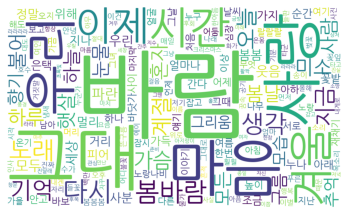

In [124]:
wc=WordCloud(font_path='NanumGothic',width=1000,height=600,background_color='white')
plt.imshow(wc.generate_from_frequencies(spring.vocab()))
plt.axis('off')
plt.show()

In [125]:
st_w = ['이제', '바람']

In [126]:
clean_text = [word for word in content_noun if word not in st_w]

In [127]:
text = ' '.join(clean_text)

In [133]:
wordcloud = WordCloud(background_color = "white",font_path='NanumGothic',width=271,height=339).generate(text)

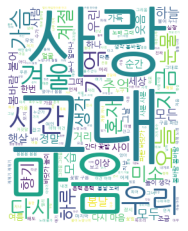

In [134]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()